In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.metrics import plot_roc_curve

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
df = pd.read_csv('heart-disease.csv')
df.head()
df.shape

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1

(303, 14)

In [3]:
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

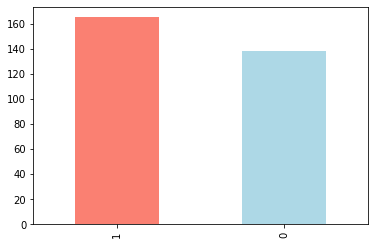

In [4]:
df['target'].value_counts().plot(kind='bar',color=['salmon','lightblue']);

In [5]:
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [7]:
df.describe()

age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997  131.623762  246.264026    0.148515   
std      9.082101    0.466011    1.032052   17.538143   51.830751    0.356198   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     47.500000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.000000    1.000000    1.000000  130.000000  240.000000    0.000000   
75%     61.000000    1.000000    2.000000  140.000000  274.500000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean     0.528053  149.646865    0.326733    1.039604    1.399340    0.729373   
std      0.525860   22.905161    0.469794    1.161075    0.616226    1.022606   
min      0.000000   71.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000  133.500000    0.000000    0.000000    1.000000    0.000000   
50%      1.000000  153.000000    0.000000    0.800000    1.000000    0.000000   
75%      1.000000  166.000000    1.000000    1.600000    2.000000    1.000000   
max      2.000000  202.000000    1.000000    6.200000    2.000000    4.000000   

             thal      target  
count  303.000000  303.000000  
mean     2.313531    0.544554  
std      0.612277    0.498835  
min      0.000000    0.000000  
25%      2.000000    0.000000  
50%      2.000000    1.000000  
75%      3.000000    1.000000  
max      3.000000    1.000000

In [8]:
df['sex'].value_counts()

1    207
0     96
Name: sex, dtype: int64

In [9]:
pd.crosstab(df['target'],df['sex'])

sex      0    1
target         
0       24  114
1       72   93

<AxesSubplot:xlabel='target'>

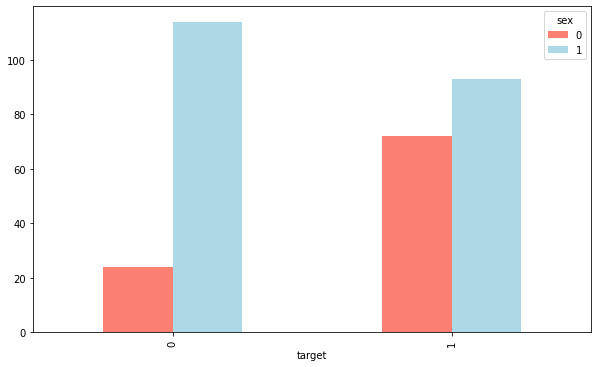

In [10]:
pd.crosstab(df['target'],df['sex']).plot(kind='bar'
                                         ,figsize = (10,6)
                                         ,color = ['salmon','lightblue'])

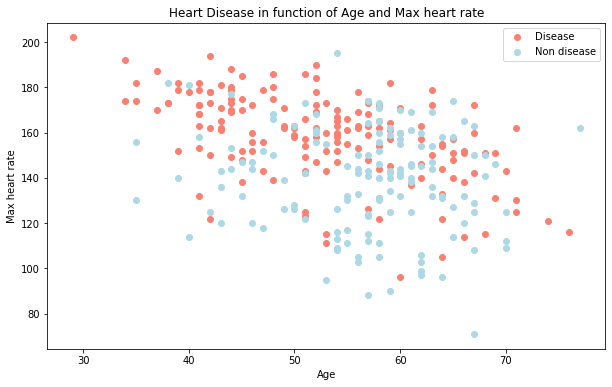

In [11]:
plt.figure(figsize=(10,6))

plt.scatter(df['age'][df['target']==1],
            df['thalach'][df['target']==1],
            c='salmon')

plt.scatter(df['age'][df['target']==0],
            df['thalach'][df['target']==0],
            c='lightblue')

plt.title('Heart Disease in function of Age and Max heart rate')
plt.xlabel('Age')
plt.ylabel('Max heart rate')
plt.legend(['Disease','Non disease']);

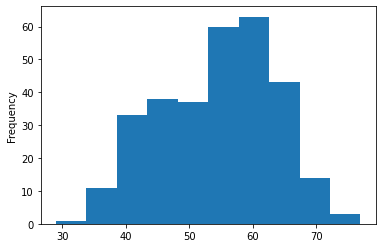

In [12]:
df['age'].plot.hist();

In [13]:
pd.crosstab(df['cp'],df['target'])

target    0   1
cp             
0       104  39
1         9  41
2        18  69
3         7  16

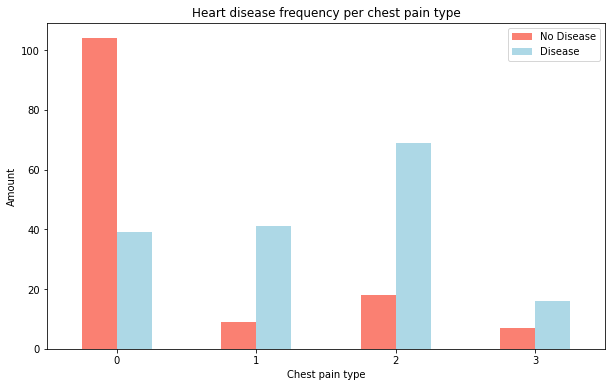

In [14]:
pd.crosstab(df['cp'],df['target']).plot(kind='bar'
                                        ,figsize=(10,6)
                                        ,color=['salmon','lightblue'])

plt.title('Heart disease frequency per chest pain type')
plt.xlabel('Chest pain type')
plt.ylabel('Amount')
plt.legend(['No Disease','Disease'])
plt.xticks(rotation=0);



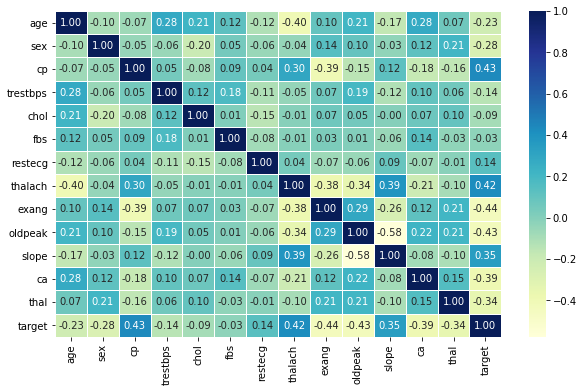

In [15]:
corr = df.corr()
fix, ax = plt.subplots(figsize=(10,6))
ax = sns.heatmap(corr,annot=True,lw=0.5,fmt='.2f',cmap='YlGnBu')

In [16]:
np.random.seed(42)
X = df.drop('target',axis=1)

y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2)

In [17]:
models = {'Logistic Regression': LogisticRegression()
          ,'KNN': KNeighborsClassifier()
          ,'Random Forest':RandomForestClassifier()}

def fit_and_score(models,X_train,X_test,y_train,y_test):
    """
    Fits and evaluate given machine learning models.
    :param models:
    :param X_train:
    :param X_test:
    :param y_train:
    :param y_test:
    :return:
    """
    # set random seed
    np.random.seed(42)
    # Make adictionary to keep model score
    model_scores = {}
    # Loop
    for name,model in models.items():
        #Fit
        model.fit(X_train,y_train)
        # Evaluate
        model_scores[name] = model.score(X_test,y_test)
    return model_scores

In [18]:
model_scores = fit_and_score(models,X_train,X_test,y_train,y_test)
model_scores

e:\programdata\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

In [19]:
model_compare = pd.DataFrame(model_scores,index=['accuracy'])

<AxesSubplot:>

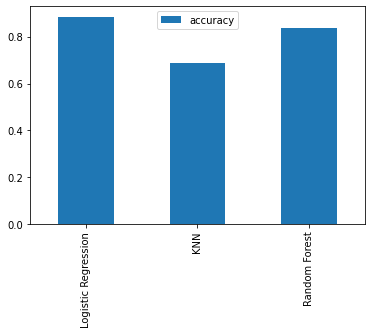

In [20]:
model_compare.T.plot.bar()

In [21]:
train_score = []
test_score = []

neighbors = range(1,21)
knn = KNeighborsClassifier()

for i in neighbors:
    knn.set_params(n_neighbors = i)
    knn.fit(X_train,y_train)

    train_score.append(knn.score(X_train,y_train));

    test_score.append(knn.score(X_test,y_test));



KNeighborsClassifier(n_neighbors=1)

KNeighborsClassifier(n_neighbors=1)

KNeighborsClassifier(n_neighbors=2)

KNeighborsClassifier(n_neighbors=2)

KNeighborsClassifier(n_neighbors=3)

KNeighborsClassifier(n_neighbors=3)

KNeighborsClassifier(n_neighbors=4)

KNeighborsClassifier(n_neighbors=4)

KNeighborsClassifier()

KNeighborsClassifier()

KNeighborsClassifier(n_neighbors=6)

KNeighborsClassifier(n_neighbors=6)

KNeighborsClassifier(n_neighbors=7)

KNeighborsClassifier(n_neighbors=7)

KNeighborsClassifier(n_neighbors=8)

KNeighborsClassifier(n_neighbors=8)

KNeighborsClassifier(n_neighbors=9)

KNeighborsClassifier(n_neighbors=9)

KNeighborsClassifier(n_neighbors=10)

KNeighborsClassifier(n_neighbors=10)

KNeighborsClassifier(n_neighbors=11)

KNeighborsClassifier(n_neighbors=11)

KNeighborsClassifier(n_neighbors=12)

KNeighborsClassifier(n_neighbors=12)

KNeighborsClassifier(n_neighbors=13)

KNeighborsClassifier(n_neighbors=13)

KNeighborsClassifier(n_neighbors=14)

KNeighborsClassifier(n_neighbors=14)

KNeighborsClassifier(n_neighbors=15)

KNeighborsClassifier(n_neighbors=15)

KNeighborsClassifier(n_neighbors=16)

KNeighborsClassifier(n_neighbors=16)

KNeighborsClassifier(n_neighbors=17)

KNeighborsClassifier(n_neighbors=17)

KNeighborsClassifier(n_neighbors=18)

KNeighborsClassifier(n_neighbors=18)

KNeighborsClassifier(n_neighbors=19)

KNeighborsClassifier(n_neighbors=19)

KNeighborsClassifier(n_neighbors=20)

KNeighborsClassifier(n_neighbors=20)

In [22]:
train_score



[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [23]:
test_score

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

Maximmum KNN score on the test data: 75.41


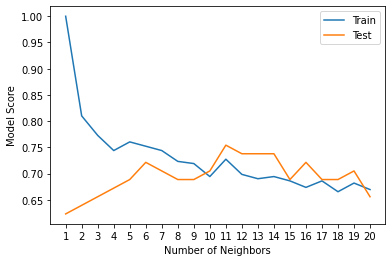

In [24]:
plt.plot(neighbors,train_score,label='Train')
plt.plot(neighbors,test_score,label='Test')

plt.xticks(np.arange(1,21))
plt.xlabel('Number of Neighbors')
plt.ylabel('Model Score')

plt.legend()

print(f'Maximmum KNN score on the test data: {max(test_score)*100:.2f}');

In [25]:
log_reg_grid = {'C':np.logspace(-4,4,20)
                ,'solver':['liblinear']}

rf_grid = {'n_estimators':np.arange(10,1000,50)
           ,'max_depth':[None,3,5,10]
           ,'min_samples_split':np.arange(2,20,2)
           ,'min_samples_leaf':np.arange(1,20,2)}

In [26]:
np.random.seed(42)
rs_log_reg = RandomizedSearchCV(LogisticRegression()
                                ,param_distributions=log_reg_grid
                                ,cv=5
                                ,n_iter=20
                                ,verbose=True)

rs_log_reg.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [27]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [28]:
rs_log_reg.score(X_test,y_test)

0.8852459016393442

In [29]:
np.random.seed(42)
rs_rf = RandomizedSearchCV(RandomForestClassifier()
                           ,param_distributions=rf_grid
                           ,cv=5
                           ,n_iter=20
                           ,verbose=True
                           )
rs_rf.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [30]:
rs_rf.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [31]:
rs_rf.score(X_test,y_test)

0.8688524590163934

In [32]:

log_reg_grid = {'C':np.logspace(-4,4,30)
                ,'solver':['liblinear']}

gs_log_reg = GridSearchCV(LogisticRegression()
                          ,param_grid=log_reg_grid
                          ,cv=5
                          ,verbose=True)
gs_log_reg.fit(X_train,y_train);

Fitting 5 folds for each of 30 candidates, totalling 150 fits


In [33]:
gs_log_reg.best_params_

gs_log_reg.score(X_test,y_test)

{'C': 0.20433597178569418, 'solver': 'liblinear'}

0.8852459016393442

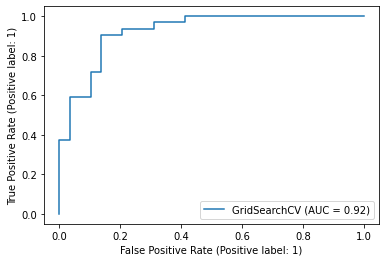

In [34]:
plot_roc_curve(gs_log_reg,X_test,y_test)

In [35]:
y_preds = gs_log_reg.predict(X_test)

In [36]:
print(confusion_matrix(y_test,y_preds))

[[25  4]
 [ 3 29]]


In [37]:
# sns.set(font_size = 1.5)

def plot_conf_mat(y_test,y_preds):
    fix,ax = plt.subplots(figsize = (3,3))
    ax = sns.heatmap(confusion_matrix(y_test,y_preds)
                     ,annot=True
                     ,cbar=False)
    plt.xlabel('True Label')
    plt.ylabel('Predict label')

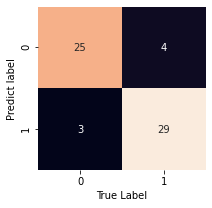

In [38]:
plot_conf_mat(y_test,y_preds)


In [39]:
print(classification_report(y_test,y_preds))


              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



In [43]:
clf = LogisticRegression(C=0.20433597178569418
                         ,solver='liblinear')

In [53]:
cv_acc = cross_val_score(clf,X,y,cv=5
                         ,scoring='accuracy')

cv_acc = np.mean(cv_acc)

cv_acc

0.8479781420765027

0.8479781420765027

In [48]:
cv_precision = cross_val_score(clf,X,y,cv=5
                         ,scoring='precision')

cv_precision = np.mean(cv_precision)
cv_precision

0.8215873015873015

In [51]:

cv_recall = cross_val_score(clf,X,y,cv=5
                         ,scoring='recall')

cv_recall = np.mean(cv_recall)
cv_recall

0.9272727272727274

In [50]:
cv_f1 = cross_val_score(clf,X,y,cv=5
                         ,scoring='f1')

cv_f1 = np.mean(cv_f1)
cv_f1

0.8705403543192143

In [54]:
cv_metrics = pd.DataFrame(
    {'Accuracy': cv_acc
     ,'Precision':cv_precision
     ,'Recall':cv_recall
     ,'F1':cv_f1}
    ,index=[0]
)

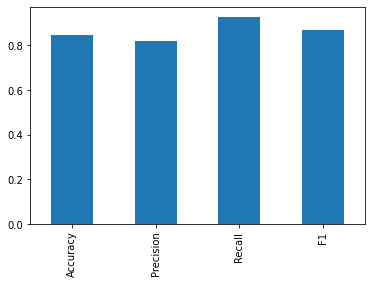

In [59]:
cv_metrics.T.plot.bar(legend=False);


In [60]:
clf = LogisticRegression(C=0.20433597178569418
                         ,solver='liblinear')
clf.fit(X_train,y_train)



LogisticRegression(C=0.20433597178569418, solver='liblinear')

In [63]:
feature_dict = dict(zip(df.columns,list(clf.coef_[0])))

In [64]:
feature_dict

{'age': 0.0032076873709286024,
 'sex': -0.8606204735539111,
 'cp': 0.6600143086174385,
 'trestbps': -0.01155970641957489,
 'chol': -0.0016649609500147373,
 'fbs': 0.04017238940156104,
 'restecg': 0.3160340177157746,
 'thalach': 0.02458922261936637,
 'exang': -0.6047017032281077,
 'oldpeak': -0.567954572983317,
 'slope': 0.4508539117301764,
 'ca': -0.6373332602422034,
 'thal': -0.6755508982355707}

<AxesSubplot:>

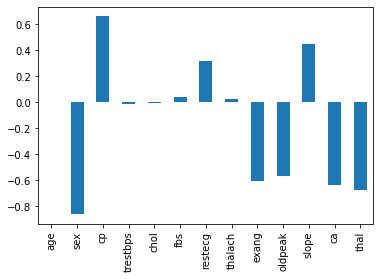

In [66]:
feature_df = pd.DataFrame(feature_dict,index=[0])

feature_df.T.plot.bar(legend=False)